# Explore here

In [1]:
# Your code here
import pandas as pd

url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df = pd.read_csv(url)
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
import os

# Define the path to store the dataset
output_dir = 'data/raw'
os.makedirs(output_dir, exist_ok=True)

# Store the dataset as a CSV file in the raw folder
df.to_csv(f'{output_dir}/airbnb_raw.csv', index=False)

print(f'Dataset stored as {output_dir}/airbnb_raw.csv')

Dataset stored as data/raw/airbnb_raw.csv


In [3]:
pip install sqlalchemy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sqlalchemy import create_engine

# Create an SQLite database (this will create a file called titanic.db)
engine = create_engine('sqlite:///data/airbnb.db')

# Store the dataset in a table called 'titanic_data'
df.to_sql('airbnb_Data', con=engine, if_exists='replace', index=False)

print("Dataset stored in SQLite database as 'airbnb_Data' table.")

Dataset stored in SQLite database as 'airbnb_Data' table.


In [5]:
# Query the data from the SQLite database
df_from_db = pd.read_sql('SELECT * FROM airbnb_Data', con=engine)

# Display the first few rows to confirm the data is loaded correctly
df_from_db.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,None,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
# Check the unique values in categorical columns
df['minimum_nights'].value_counts()

minimum_nights
1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
275        1
182        1
114        1
85         1
36         1
Name: count, Length: 109, dtype: int64

In [8]:
# Check the unique values in categorical columns
df['price'].value_counts()

price
100     2051
150     2047
50      1534
60      1458
200     1401
        ... 
930        1
920        1
4100       1
3512       1
1494       1
Name: count, Length: 674, dtype: int64

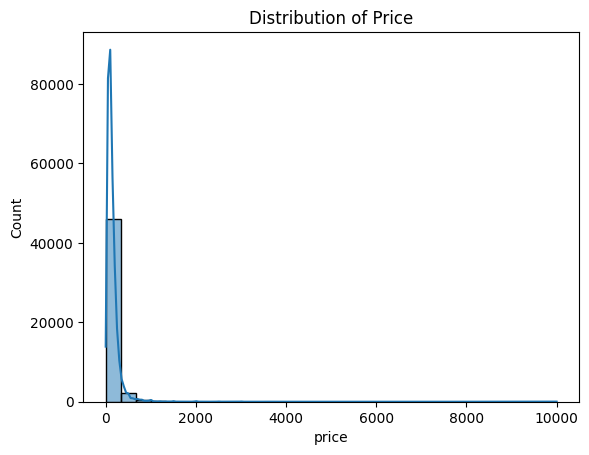

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram for the 'price' column
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.show()

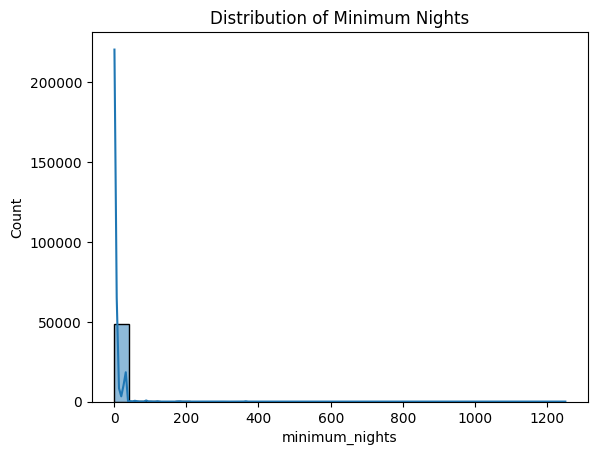

In [10]:
# Plot a histogram for the 'minimum nights' column
sns.histplot(df['minimum_nights'], bins=30, kde=True)
plt.title('Distribution of Minimum Nights')
plt.show()

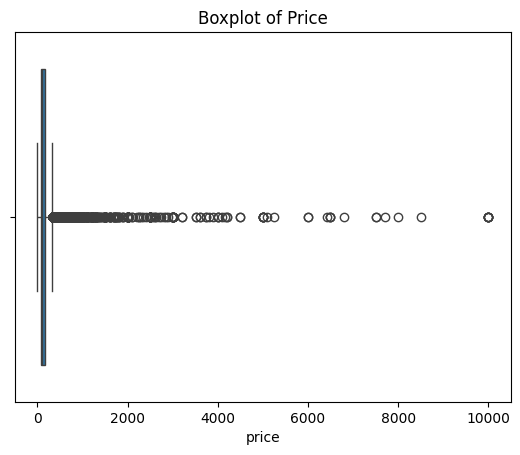

In [11]:
# Boxplot for Price
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.show()

In [12]:
# Check the price (class balance)
df['price'].value_counts(normalize=True)

price
100     0.041947
150     0.041865
50      0.031373
60      0.029819
200     0.028653
          ...   
930     0.000020
920     0.000020
4100    0.000020
3512    0.000020
1494    0.000020
Name: proportion, Length: 674, dtype: float64

In [13]:
# Obtain dimensions of dataframe
# (# rows, # columns)
df.shape

(48895, 16)

In [14]:
df.columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df = df.drop(["id", "name", "host_id", "host_name", "last_review", "reviews_per_month"], axis=1)
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


In [17]:
# Calculate the total number of missing values for each column
missing_values = df.isnull().sum()

# Calculate the proportion of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine both into a DataFrame for better visualization
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data

,Missing Values,Percentage
neighbourhood_group,0,0.0
neighbourhood,0,0.0
latitude,0,0.0
longitude,0,0.0
room_type,0,0.0
price,0,0.0
minimum_nights,0,0.0
number_of_reviews,0,0.0
calculated_host_listings_count,0,0.0
availability_365,0,0.0


In [18]:
# Define the threshold (e.g., 30%)
threshold = 30

# Drop columns where the percentage of missing values exceeds the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop those columns from the dataframe
df = df.drop(columns=columns_to_drop)

print(f"Following columns were dropped: {list(columns_to_drop)}")

Following columns were dropped: []


In [19]:
# Check the remaining columns after dropping
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.7+ MB


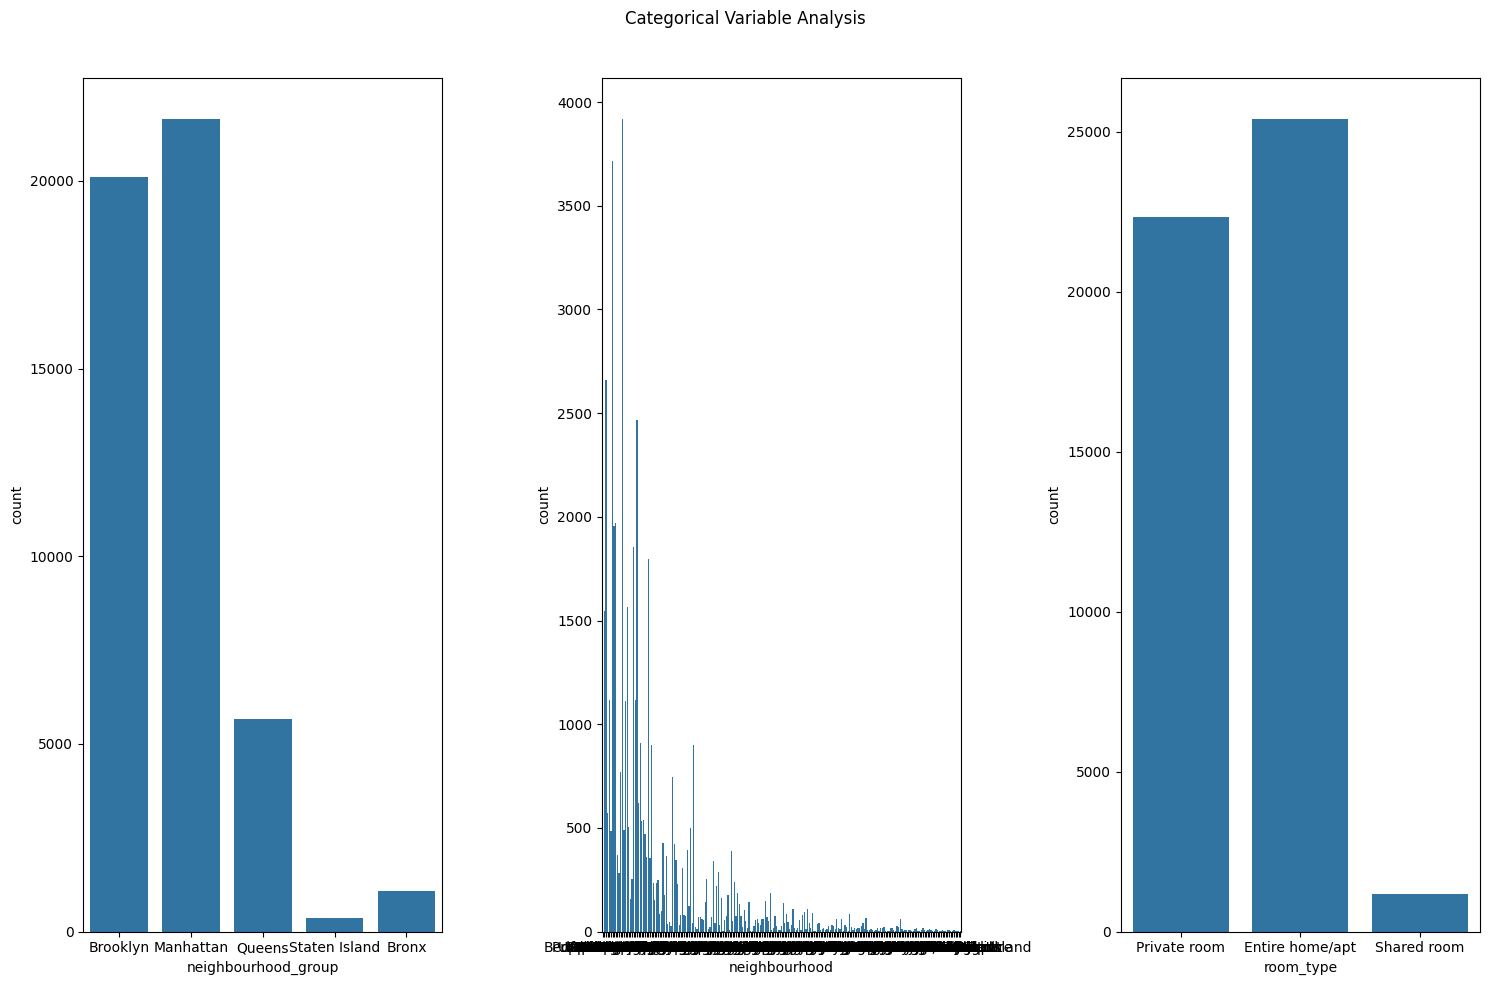

In [20]:
categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']

fig, axis = plt.subplots(1, 3, figsize=(15, 10))  

sns.countplot(ax=axis[0], data=df, x="neighbourhood_group")
sns.countplot(ax=axis[1], data=df, x="neighbourhood")
sns.countplot(ax=axis[2], data=df, x="room_type")


plt.suptitle("Categorical Variable Analysis")
plt.tight_layout(rect=[0, 0, 1, 0.96])  


plt.show()


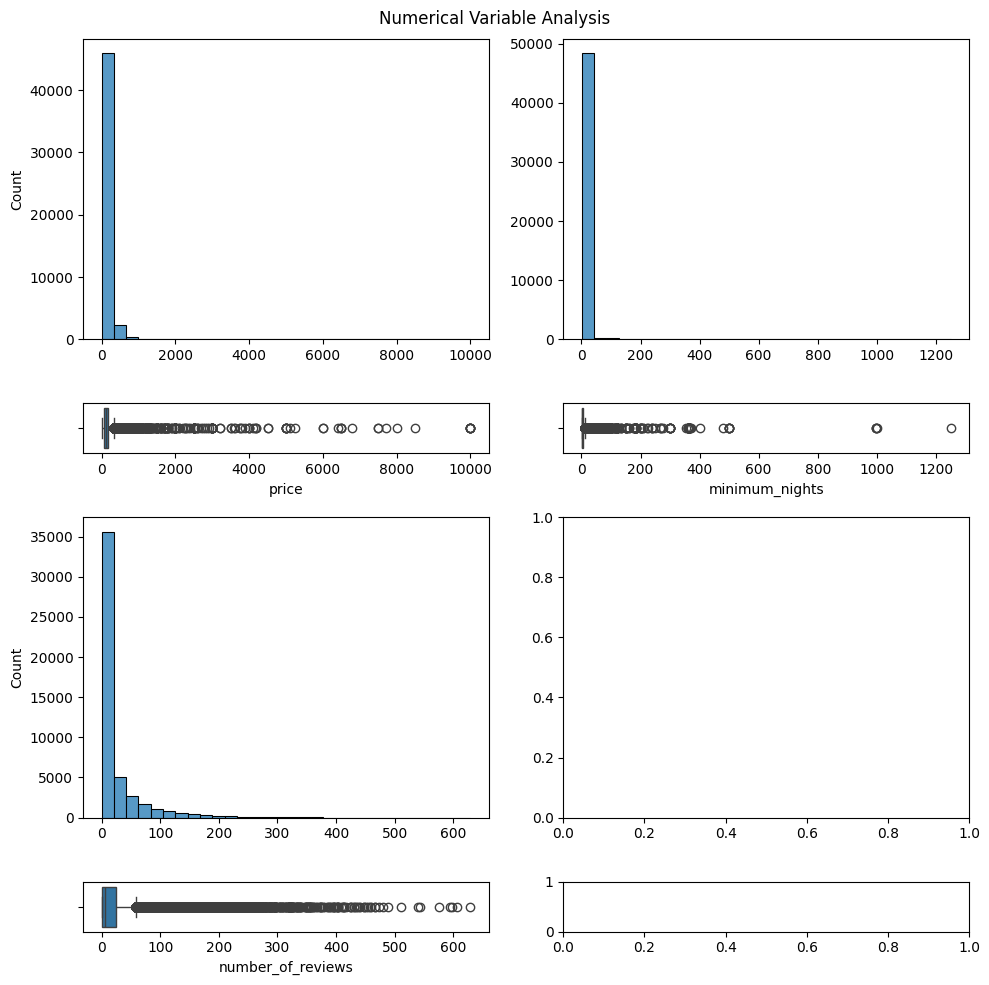

In [21]:
numerical_features = ['price',	'minimum_nights', 'number_of_reviews']


fig, axis = plt.subplots(4, 2, figsize = (10, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = df, x = "price", bins=30).set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "price") 
sns.histplot(ax = axis[0, 1], data = df, x = "minimum_nights", bins=30).set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")
sns.histplot(ax = axis[2, 0], data = df, x = "number_of_reviews", bins=30).set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "number_of_reviews")


plt.suptitle("Numerical Variable Analysis")
plt.tight_layout()

# Show the plot
plt.show()

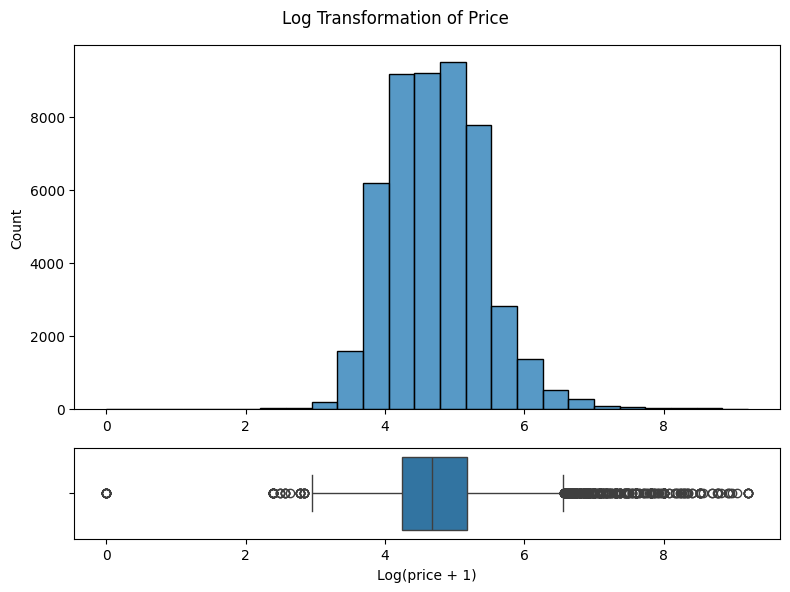

In [22]:
import numpy as np

# Create a figure with 2 subplots: one for the histogram and one for the boxplot
fig, axis = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [4, 1]})

# Apply log transformation to 'Price' using log1p (log(x + 1)) to avoid log(0)
# Plot the log-transformed 'Price' histogram and boxplot
sns.histplot(np.log1p(df['price']), bins=25, ax=axis[0]).set(xlabel = None)
sns.boxplot(x=np.log1p(df['price']), ax=axis[1])
axis[1].set_xlabel('Log(price + 1)')

# Adjust layout and show the plot
plt.suptitle("Log Transformation of Price")
plt.tight_layout()
plt.show()

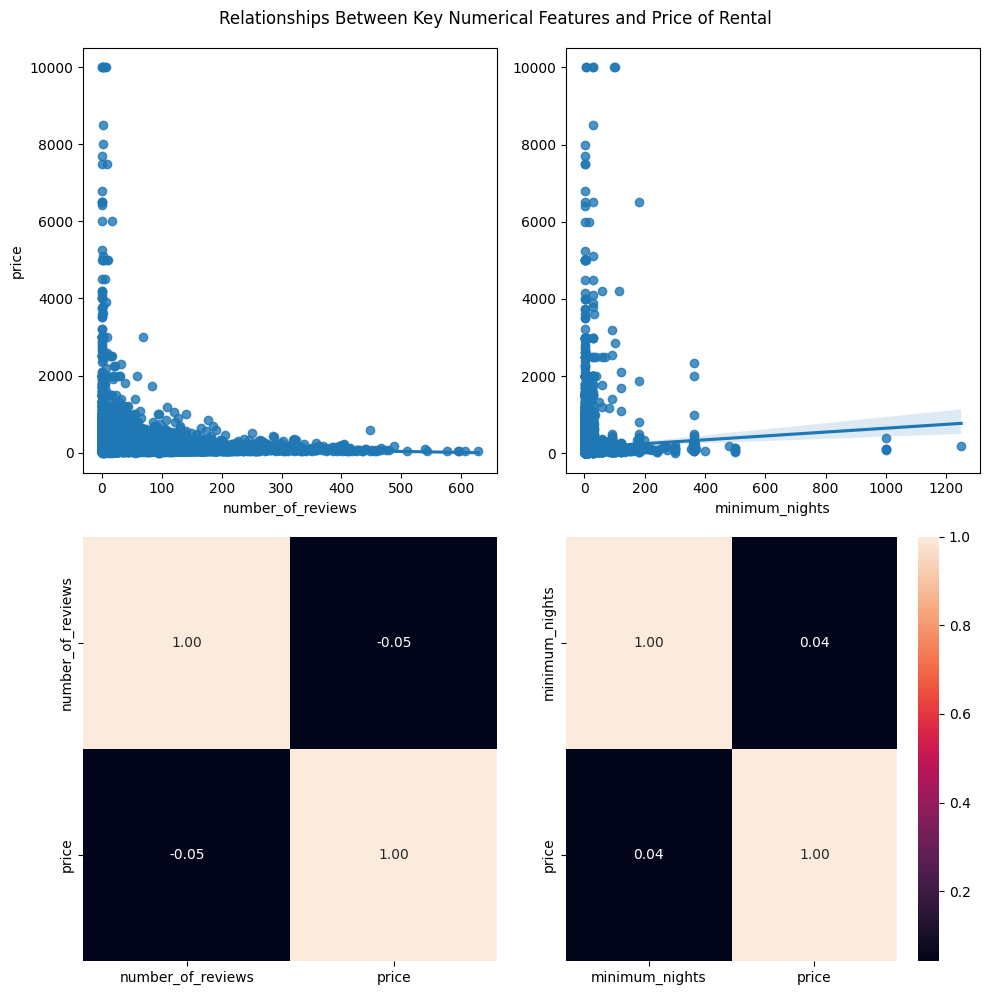

In [23]:
# Our numerical features
numerical_features

fig, axis = plt.subplots(2, 2, figsize = (10, 10))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = df, x = "number_of_reviews", y = "price")
sns.heatmap(df[["number_of_reviews", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "minimum_nights", y = "price").set(ylabel=None)
sns.heatmap(df[["minimum_nights", "price"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])


plt.suptitle("Relationships Between Key Numerical Features and Price of Rental", y=0.99)
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
# Our numerical features
numerical_features

['price', 'minimum_nights', 'number_of_reviews']

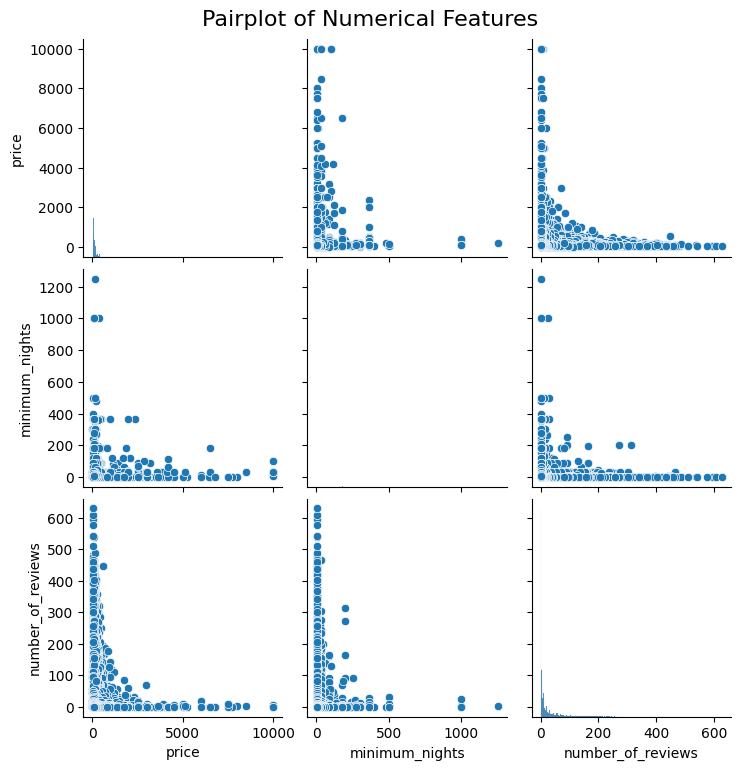

In [25]:
# Warning! Pairplots can be slow!
sns.pairplot(data = df[numerical_features])
plt.suptitle("Pairplot of Numerical Features", y=1.02, fontsize=16)
plt.show()

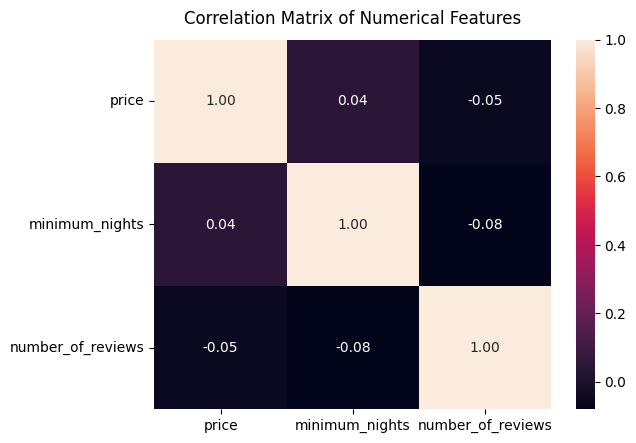

In [26]:
sns.heatmap(df[numerical_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Matrix of Numerical Features", y=1.02)
plt.show()

In [27]:
# Our categorical features
categorical_features

['neighbourhood_group', 'neighbourhood', 'room_type']

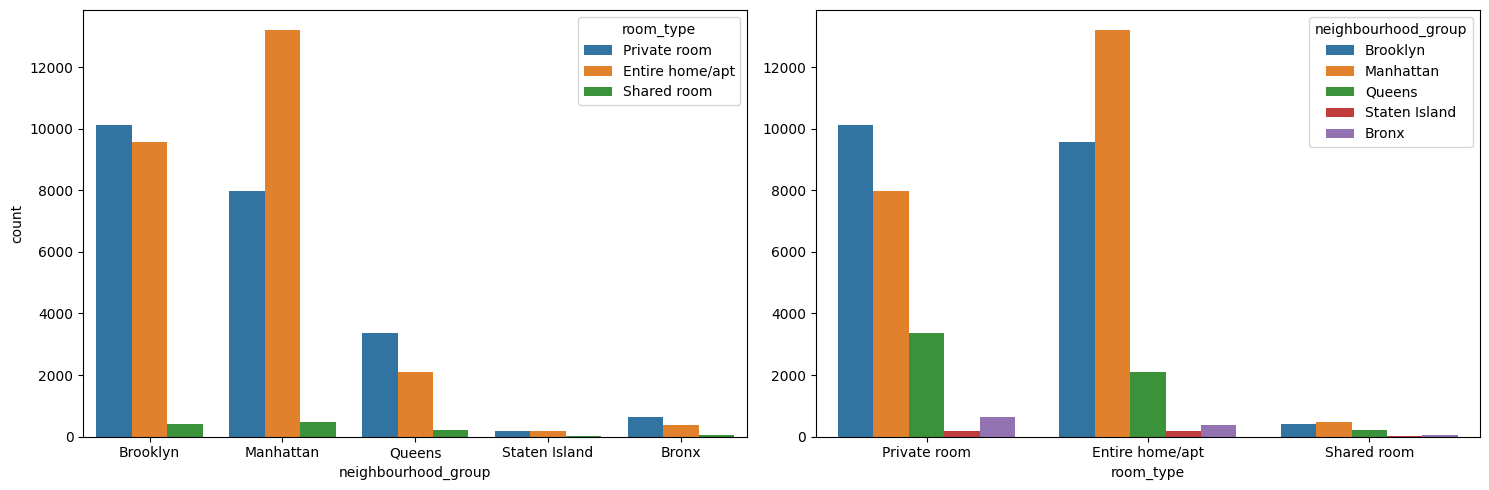

In [28]:
fig, axis = plt.subplots(1,2, figsize = (15, 5))

sns.countplot(ax = axis[0], data = df, x = "neighbourhood_group", hue = "room_type")
sns.countplot(ax = axis[1], data = df, x = "room_type", hue = "neighbourhood_group").set(ylabel = None)


plt.tight_layout()

plt.show()

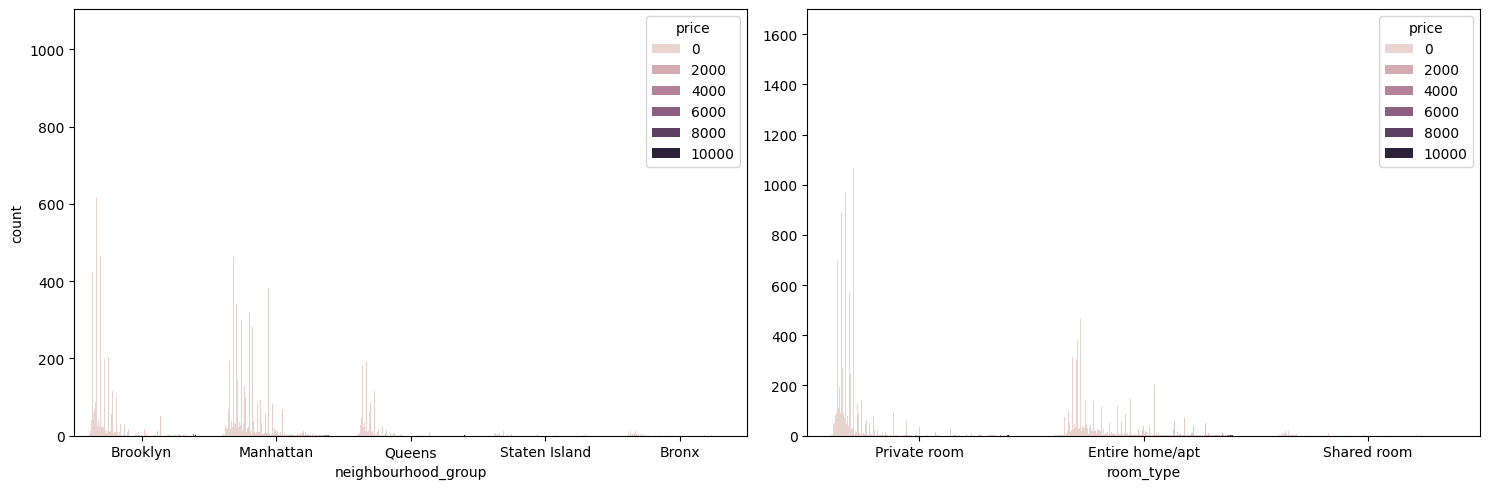

In [29]:
fig, axis = plt.subplots(1,2, figsize = (15, 5))



sns.countplot(ax = axis[0], data = df, x = "neighbourhood_group", hue = "price")
sns.countplot(ax = axis[1], data = df, x = "room_type", hue = "price").set(ylabel = None)


plt.tight_layout()

plt.show()

In [30]:

df["neighbourhood_n"] = pd.factorize(df["neighbourhood"])[0]
df["neighbourhood_group_n"] = pd.factorize(df["neighbourhood_group"])[0]
df["room_type_n"] = pd.factorize(df["room_type"])[0]

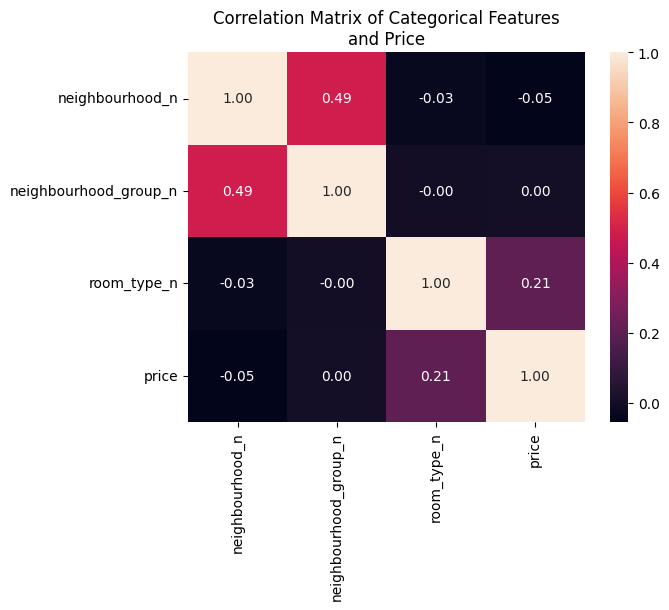

In [31]:
categorical_features = ['neighbourhood_n', 'neighbourhood_group_n', 'room_type_n']

sns.heatmap(df[categorical_features + ['price']].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Matrix of Categorical Features\nand Price")
plt.show()

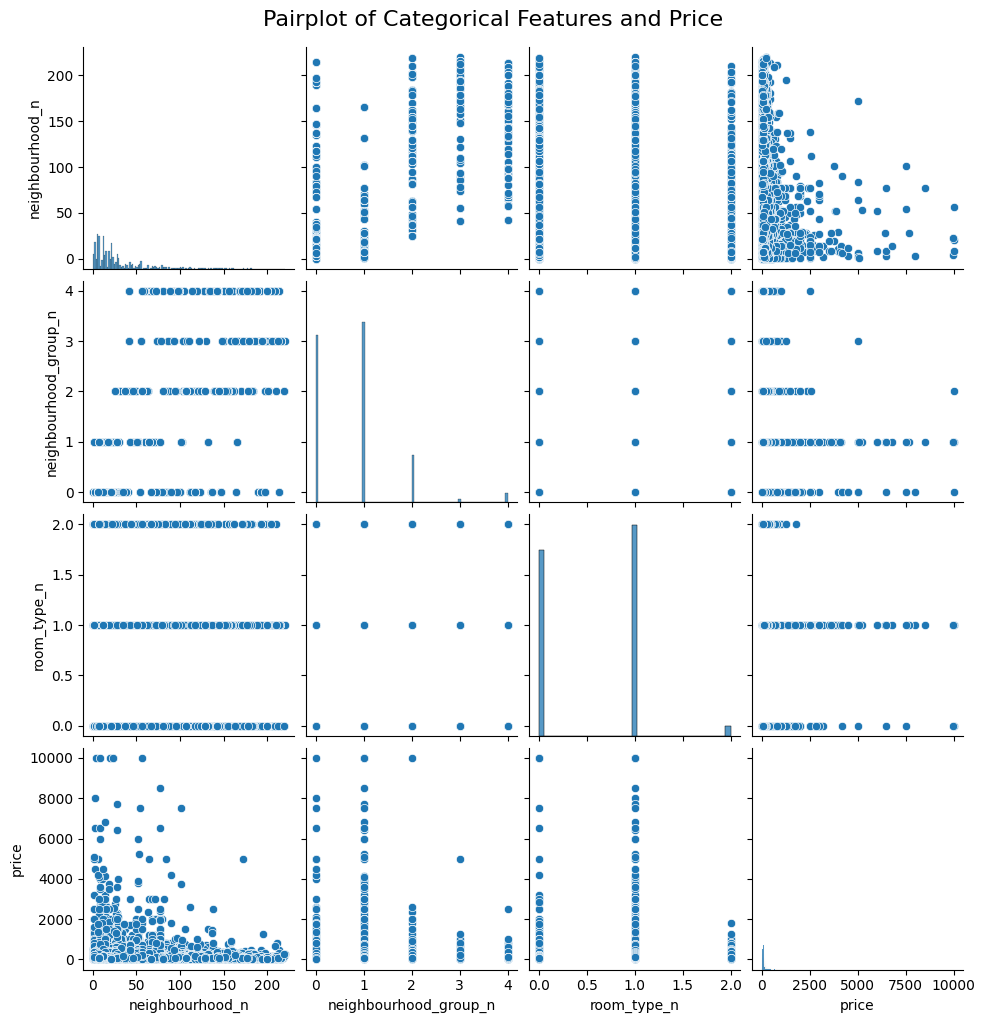

In [32]:
# Warning! Pairplots can be slow!
# And not too useful for categorical data
sns.pairplot(data = df[categorical_features + ['price']])
plt.suptitle("Pairplot of Categorical Features and Price", y=1.02, fontsize=16)
plt.show()

In [33]:
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Numerical features: ['price', 'minimum_nights', 'number_of_reviews']
Categorical features: ['neighbourhood_n', 'neighbourhood_group_n', 'room_type_n']


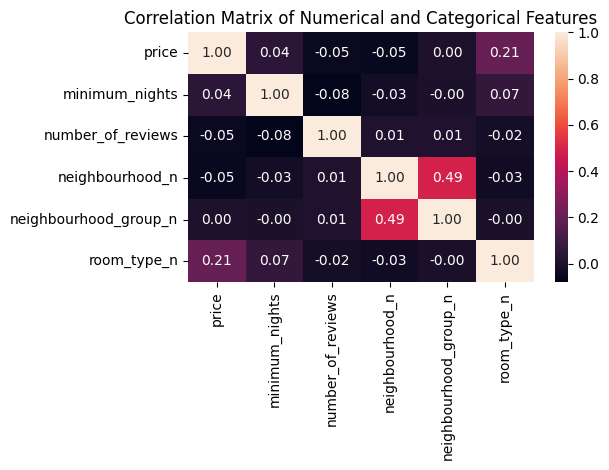

In [34]:
sns.heatmap(df[numerical_features + categorical_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Matrix of Numerical and Categorical Features")
plt.tight_layout()

In [35]:
df.describe().loc[['mean', 'min', '25%', '75%', 'max']]

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_n,neighbourhood_group_n,room_type_n
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327,29.888782,0.786911,0.567113
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000,7.500000,0.000000,0.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000,37.000000,1.000000,1.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000,220.000000,4.000000,2.000000


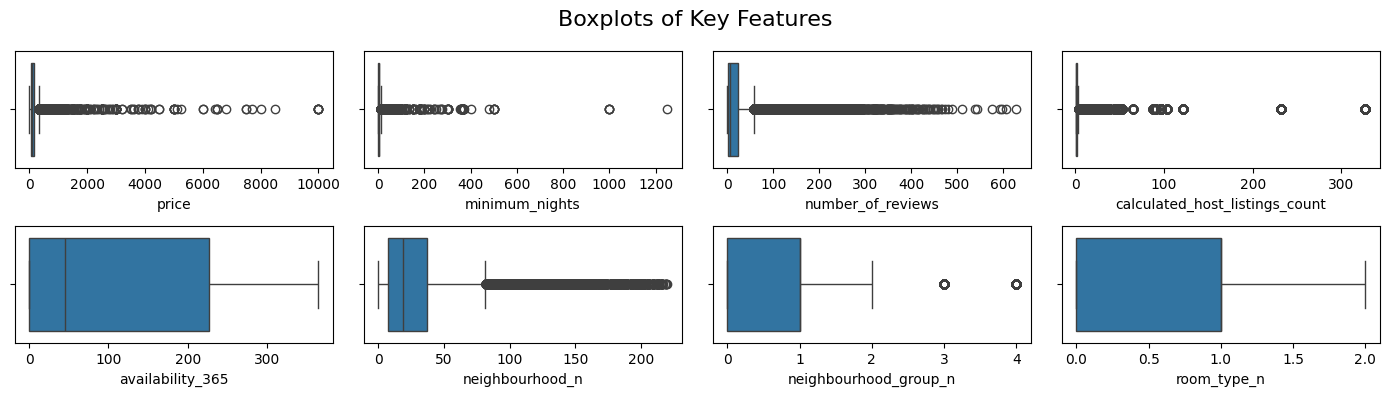

In [36]:
fig, axis = plt.subplots(2, 4, figsize = (14, 4))

sns.boxplot(ax = axis[0, 0], data = df, x = "price")
sns.boxplot(ax = axis[0, 1], data = df, x = "minimum_nights")
sns.boxplot(ax = axis[0, 2], data = df, x = "number_of_reviews")
sns.boxplot(ax = axis[0, 3], data = df, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[1, 0], data = df, x = "availability_365")
sns.boxplot(ax = axis[1, 1], data = df, x = "neighbourhood_n")
sns.boxplot(ax = axis[1, 2], data = df, x = "neighbourhood_group_n")
sns.boxplot(ax = axis[1, 3], data = df, x = "room_type_n")

fig.suptitle("Boxplots of Key Features", fontsize=16)
plt.tight_layout()

plt.show()

In [37]:
df['price'].describe()



count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [38]:
df['minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [39]:
df['number_of_reviews'].describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [40]:
df['calculated_host_listings_count'].describe()

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [42]:
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Numerical features: ['price', 'minimum_nights', 'number_of_reviews']
Categorical features: ['neighbourhood_n', 'neighbourhood_group_n', 'room_type_n']


In [43]:
X = df[['minimum_nights', 'number_of_reviews','neighbourhood_n', 'neighbourhood_group_n', 'room_type_n']] # A dataframe (double brackets)
y = df['price'] # A series (single brackets)

In [44]:
X

,minimum_nights,number_of_reviews,neighbourhood_n,neighbourhood_group_n,room_type_n
0,1,9,0,0,0
1,1,45,1,1,1
2,3,0,2,1,0
3,1,270,3,0,1
4,10,9,4,1,1
...,...,...,...,...,...
48890,2,0,6,0,0
48891,4,0,21,0,0
48892,10,0,2,1,1
48893,1,0,7,1,2


In [45]:
y

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [47]:
print(f"Total rows: {df.shape[0]}")
print(f"Dimensions of X_train: {X_train.shape}")
print(f"Dimensions of y_train: {y_train.shape}")
print(f"Proportion of train set: {X_train.shape[0]} / {df.shape[0]} = {X_train.shape[0]/df.shape[0]:.2f} = {X_train.shape[0]/df.shape[0]*100:.0f}%")

Total rows: 48895
Dimensions of X_train: (39116, 5)
Dimensions of y_train: (39116,)
Proportion of train set: 39116 / 48895 = 0.80 = 80%


In [48]:
print(f"Total rows: {df.shape[0]}")
print(f"Dimensions of X_test: {X_test.shape}")
print(f"Dimensions of y_test: {y_test.shape}")
print(f"Proportion of test set: {X_test.shape[0]} / {df.shape[0]} = {X_test.shape[0]/df.shape[0]:.2f} = {X_test.shape[0]/df.shape[0]*100:.0f}%")

Total rows: 48895
Dimensions of X_test: (9779, 5)
Dimensions of y_test: (9779,)
Proportion of test set: 9779 / 48895 = 0.20 = 20%


In [50]:
high_price_count = df[df['price'] >= 1000].shape[0] 
print(high_price_count)

298


In [51]:
zero_price_count = df[df['price'] == 0].shape[0] 
print(zero_price_count)

11


In [52]:
# PRICE

# Step 1: Calculate the mean value of the 'price' column using non-zero values from y_train
mean_price_train = np.mean(y_train[y_train != 0])

# Step 2: Replace '0' values with the mean value in both y_train and y_test
y_train[y_train == 0] = mean_price_train
y_test[y_test == 0] = mean_price_train
#REVIEWS

mean_reviews_train = X_train['number_of_reviews'].mean()

# Step 2: Replace values above 20 with the mean value in both the training and test sets
X_train.loc[X_train['number_of_reviews'] > 20, 'number_of_reviews'] = mean_reviews_train
X_test.loc[X_test['number_of_reviews'] > 20, 'number_of_reviews'] = mean_reviews_train
# MIN NIGHTS

mean_minimum_nights_train = X_train['minimum_nights'].mean()

# Step 2: Replace values above 20 with the mean value in both the training and test sets
X_train.loc[X_train['minimum_nights'] > 20, 'minimum_nights'] = mean_minimum_nights_train
X_test.loc[X_test['minimum_nights'] > 20, 'minimum_nights'] = mean_minimum_nights_train

/tmp/ipykernel_45933/2567309986.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '153.09923293275378' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  y_train[y_train == 0] = mean_price_train
/tmp/ipykernel_45933/2567309986.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '153.09923293275378' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  y_test[y_test == 0] = mean_price_train
/tmp/ipykernel_45933/2567309986.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '23.2806268534615' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[X_train['number_of_reviews'] > 20, 'number_of_reviews'] = mean_reviews_train
/tmp

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
from sklearn.feature_selection import f_classif, SelectKBest


selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train_scaled, y_train)

ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train_scaled), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scaled), columns = X_test.columns.values[ix])
X_train_sel

,minimum_nights,number_of_reviews,neighbourhood_n,neighbourhood_group_n,room_type_n
0,-0.510162,-0.896914,-0.314715,0.247546,0.800529
1,-0.849301,-1.002042,-0.545753,0.247546,0.800529
2,-0.510162,-0.581529,-0.025917,-0.934895,-1.047420
3,-0.510162,-0.686658,-0.690152,-0.934895,0.800529
4,-0.510162,1.445407,-0.574633,-0.934895,-1.047420
...,...,...,...,...,...
39111,-0.171022,0.364624,-0.256955,-0.934895,-1.047420
39112,-0.171022,-0.266145,1.418073,-0.934895,-1.047420
39113,1.185535,-1.002042,2.890942,2.612429,0.800529
39114,-0.849301,-1.002042,-0.690152,-0.934895,-1.047420


In [56]:
dict(zip(X_train.columns,selection_model.scores_))


{'minimum_nights': np.float64(1.9242720614412236),
 'number_of_reviews': np.float64(2.845617596051699),
 'neighbourhood_n': np.float64(3.266046917273916),
 'neighbourhood_group_n': np.float64(1.1088122336779722),
 'room_type_n': np.float64(31.958338366074074)}

In [57]:
X_train_sel['price'] = list(y_train)
X_test_sel['price'] = list(y_test)


In [60]:
X_train_sel.to_csv('/workspaces/TCT_EDA_machine-learning-python-template/data/processed/clean_train.csv')
X_test_sel.to_csv('/workspaces/TCT_EDA_machine-learning-python-template/data/processed/clean_test.csv')